In [101]:
## Importing all the Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor

In [135]:
df = pd.read_csv('BlackFriday.csv')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [137]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Data Cleaning Process

In [138]:
null_columns = df.columns[df.isna().any()]

In [139]:
df[null_columns].isna().sum()

Product_Category_2    166986
Product_Category_3    373299
dtype: int64

In [140]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [141]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [142]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [143]:
null_columns

Index(['Product_Category_2', 'Product_Category_3'], dtype='object')

In [144]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [145]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(0).astype(int)

In [146]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(0).astype(int)

In [147]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,6.784907,3.871773,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,6.211618,6.265963,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,0.000000,0.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,0.000000,0.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,5.000000,0.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,14.000000,8.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [148]:
df = df.replace({'City_Category':{'A': 0, 'B':1, 'C':2}})

In [149]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [150]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '').astype(int)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null int64
Stay_In_Current_City_Years    537577 non-null int32
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null int32
Product_Category_3            537577 non-null int32
Purchase                      537577 non-null int64
dtypes: int32(3), int64(6), object(3)
memory usage: 43.1+ MB


In [152]:
## combining Gender and Marital_status

df['Gender_Marital'] = df.apply(lambda x: '%s%s' % (x['Gender'], x['Marital_Status']), axis = 1)

In [153]:
df['Gender_Marital'].unique()

array(['F0', 'M0', 'M1', 'F1'], dtype=object)

In [154]:
df = df.replace({'Gender_Marital':{'F0':0, 'M0':1, 'M1':2, 'F1':3}})

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 13 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null int64
Stay_In_Current_City_Years    537577 non-null int32
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null int32
Product_Category_3            537577 non-null int32
Purchase                      537577 non-null int64
Gender_Marital                537577 non-null int64
dtypes: int32(3), int64(7), object(3)
memory usage: 47.2+ MB


In [156]:
df = df.drop(['Gender', 'Marital_Status'],axis=1)

In [157]:
## Dropping some other columns 
df = df.drop(['User_ID','Product_ID'],axis=1)

In [159]:
df = df.replace({'Age':{'0-17':0, '55+':6, '26-35':2, '46-50':4, '51-55':5, '36-45':3, '18-25':1}})

In [161]:
print("dataframe Information", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 9 columns):
Age                           537577 non-null int64
Occupation                    537577 non-null int64
City_Category                 537577 non-null int64
Stay_In_Current_City_Years    537577 non-null int32
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null int32
Product_Category_3            537577 non-null int32
Purchase                      537577 non-null int64
Gender_Marital                537577 non-null int64
dtypes: int32(3), int64(6)
memory usage: 30.8 MB
dataframe Information None


### Exploratory Data Analysis

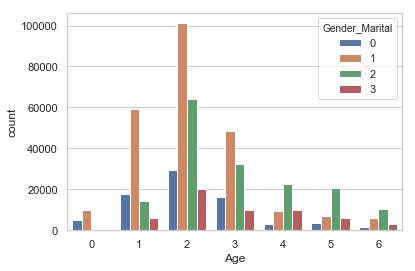

In [162]:
sns.countplot(df['Age'],hue=df['Gender_Marital'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


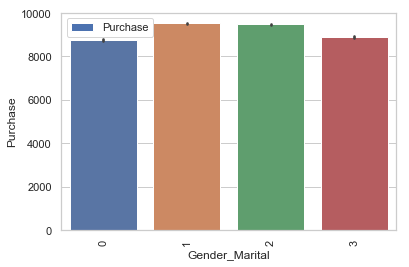

In [163]:
# Purchase vs Gender_Marital
df[['Gender_Marital', 'Purchase']].groupby('Gender_Marital').mean().plot.bar()
sns.barplot('Gender_Marital', 'Purchase', data=df)
plt.show()

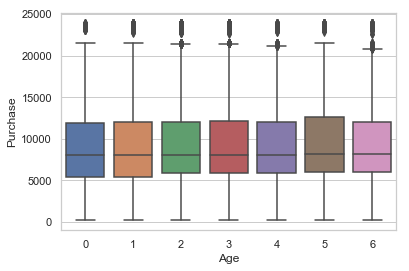

In [164]:
sns.boxplot('Age','Purchase', data = df)
plt.show()

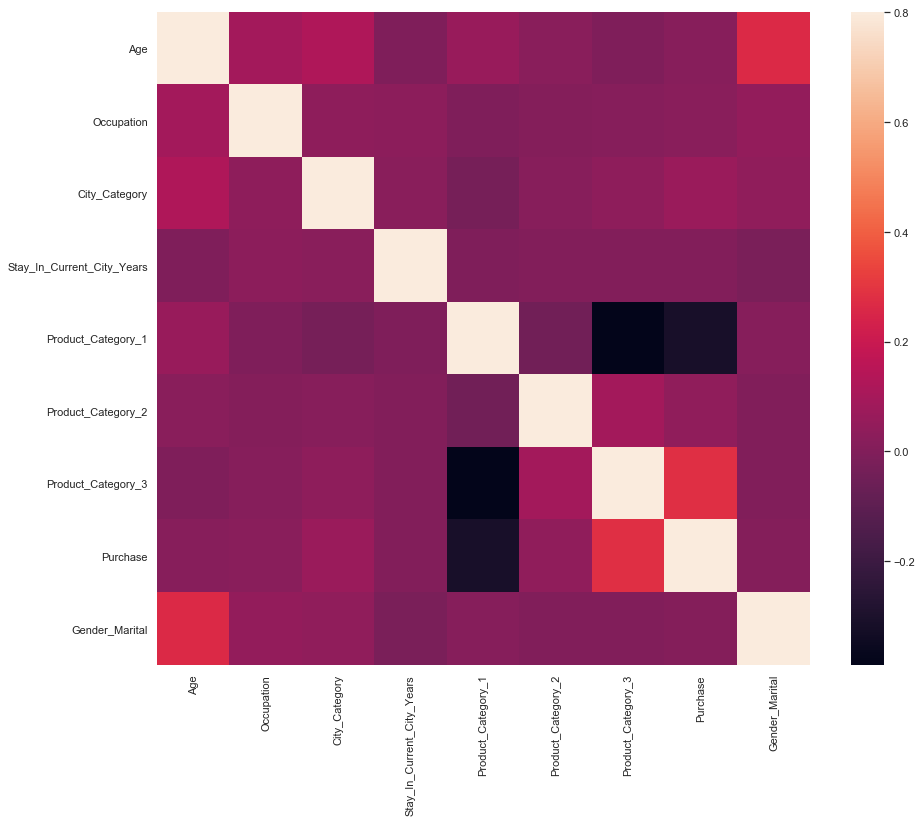

In [165]:
fig,ax = plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), vmax=.8, square=True)

- As we see ``Product_Category_1`` , ``Product_category_3`` and ``Purchase`` are having high negative correlated

In [166]:
df.corr()

,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_Marital
Age,1.000000,0.091898,0.122308,-0.004754,0.061951,0.019723,-0.006922,0.017717,0.265461
Occupation,0.091898,1.000000,0.033781,0.031203,-0.008114,0.006792,0.011941,0.021104,0.047666
City_Category,0.122308,0.033781,1.000000,0.019948,-0.027444,0.019535,0.037751,0.068507,0.040527
Stay_In_Current_City_Years,-0.004754,0.031203,0.019948,1.000000,-0.004182,0.001244,0.001992,0.005470,-0.019005
Product_Category_1,0.061951,-0.008114,-0.027444,-0.004182,1.000000,-0.040730,-0.389048,-0.314125,0.012473
Product_Category_2,0.019723,0.006792,0.019535,0.001244,-0.040730,1.000000,0.090284,0.038395,0.000516
Product_Category_3,-0.006922,0.011941,0.037751,0.001992,-0.389048,0.090284,1.000000,0.284120,-0.000400
Purchase,0.017717,0.021104,0.068507,0.005470,-0.314125,0.038395,0.284120,1.000000,0.008856
Gender_Marital,0.265461,0.047666,0.040527,-0.019005,0.012473,0.000516,-0.000400,0.008856,1.000000


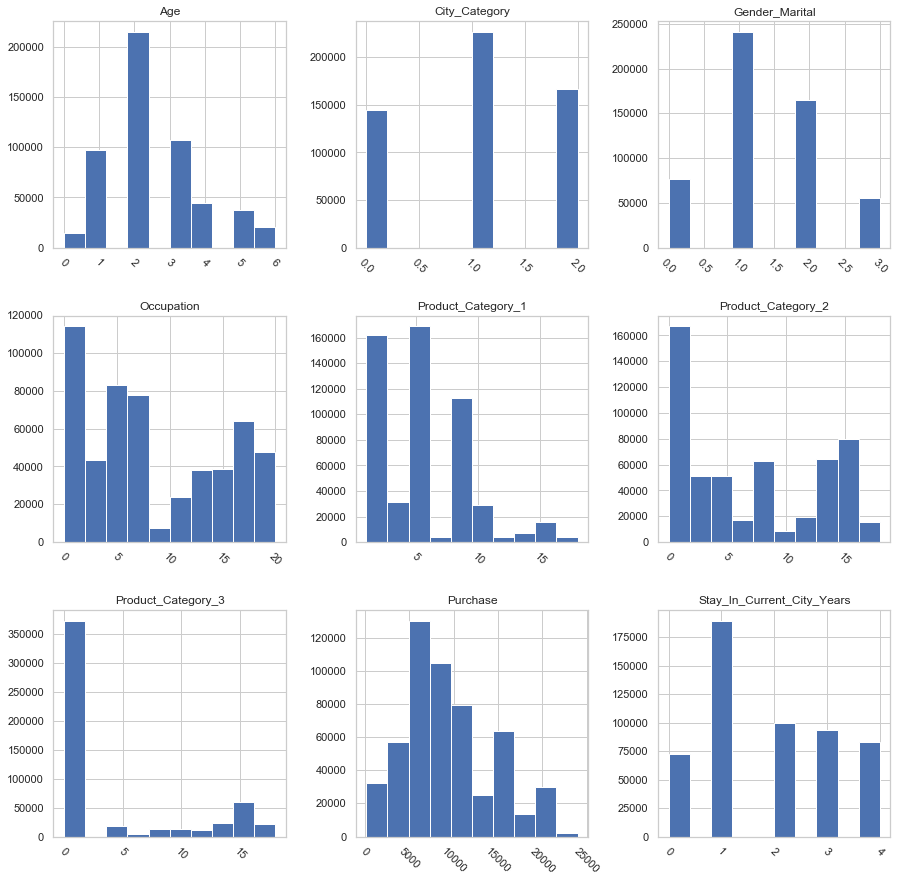

In [167]:
df.hist(figsize=(15,15), xrot=-45) 
plt.show()

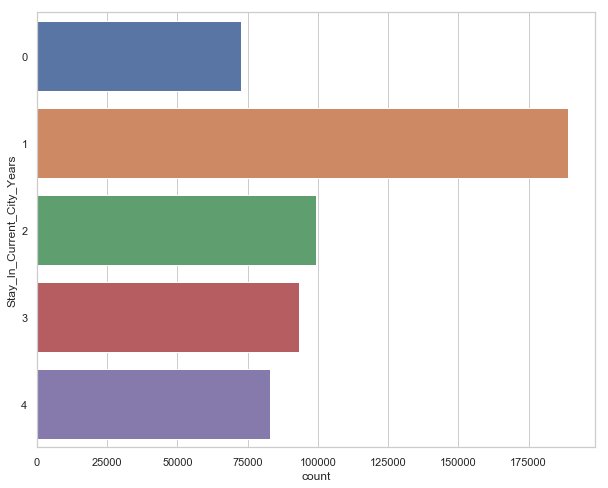

In [168]:
plt.figure(figsize=(10,8))
sns.countplot(y='Stay_In_Current_City_Years', data=df)

In [169]:
df.head()

,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_Marital
0,0,10,0,2,3,0,0,8370,0
1,0,10,0,2,1,6,14,15200,0
2,0,10,0,2,12,0,0,1422,0
3,0,10,0,2,12,14,0,1057,0
4,6,16,2,4,8,0,0,7969,1


### Data Transformation 
- Age
- City_Category
- Gender_Marital
- Stay_Current_City_Years

In [170]:
df = pd.get_dummies(df, columns=['City_Category', 'Stay_In_Current_City_Years', 'Gender_Marital'])

In [171]:
df.head()

,Age,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_0,City_Category_1,City_Category_2,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Gender_Marital_0,Gender_Marital_1,Gender_Marital_2,Gender_Marital_3
0,0,10,3,0,0,8370,1,0,0,0,0,1,0,0,1,0,0,0
1,0,10,1,6,14,15200,1,0,0,0,0,1,0,0,1,0,0,0
2,0,10,12,0,0,1422,1,0,0,0,0,1,0,0,1,0,0,0
3,0,10,12,14,0,1057,1,0,0,0,0,1,0,0,1,0,0,0
4,6,16,8,0,0,7969,0,0,1,0,0,0,0,1,0,1,0,0


In [172]:
df = pd.get_dummies(df, columns=['Age'])

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 24 columns):
Occupation                      537577 non-null int64
Product_Category_1              537577 non-null int64
Product_Category_2              537577 non-null int32
Product_Category_3              537577 non-null int32
Purchase                        537577 non-null int64
City_Category_0                 537577 non-null uint8
City_Category_1                 537577 non-null uint8
City_Category_2                 537577 non-null uint8
Stay_In_Current_City_Years_0    537577 non-null uint8
Stay_In_Current_City_Years_1    537577 non-null uint8
Stay_In_Current_City_Years_2    537577 non-null uint8
Stay_In_Current_City_Years_3    537577 non-null uint8
Stay_In_Current_City_Years_4    537577 non-null uint8
Gender_Marital_0                537577 non-null uint8
Gender_Marital_1                537577 non-null uint8
Gender_Marital_2                537577 non-null uint8
Gender_Marital_3         

In [174]:
df.shape

(537577, 24)

In [175]:
df = df.drop('Product_Category_3', axis = 1)


In [186]:
df = df.drop(['Age_6','Gender_Marital_3','Stay_In_Current_City_Years_4','City_Category_2'], axis = 1)

#### Model Buliding

- The size of the dataset  around ``0.5 Millions`` rows so we will go with the sampling of the data
- We can sample out the around ``100000`` rows for our model buliding using _``pandas.dataframe.sample``_

In [187]:
sampledf = df.sample(100000, random_state=0)

In [188]:
sampledf.shape

(100000, 19)

In [199]:
#y = sampledf.Purchase
y = df.Purchase

In [200]:
#x = sampledf.drop('Purchase', axis = 1)
x = df.drop('Purchase', axis = 1)

In [201]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state = 0 )

In [202]:
## Scaling the data
scaler = StandardScaler()

In [203]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  


In [204]:
## Building 1st model - Linear Regression
lreg = LinearRegression()
lreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [205]:
y_predict = lreg.predict(x_test)

In [207]:
print(lreg.score(x_train, y_train))
print(lreg.score(x_test, y_test))

0.10710971815362512
0.10471019737611931


In [208]:
## Using SGD regressor 
sgd_regressor = SGDRegressor(random_state=0, max_iter= 10000, learning_rate='optimal', penalty='l2')

In [209]:
sgd_regressor.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='squared_loss', max_iter=10000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=0, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [132]:
print(sgd_regressor.score(x_train,y_train))
print(sgd_regressor.score(x_test,y_test))

0.13388666397852456
0.13646995548457197


- Accuracy of the model is not good so we will try dropping some features and again run the linear model